<a href="https://colab.research.google.com/github/Ayodeji-python/Modern_Data_Science/blob/Practise/simlarity_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from math import*
from decimal import Decimal

a = [0,3,4,5]
b = [7,6,3,-1]

def euclidean_distance(x,y):

  return sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

def manhattan_distance(x,y):

  return sum(abs(a-b) for a, b in zip(x,y)) 

def nth_root(value, n_root):

  root_value = 1/float(n_root)
  return round(Decimal(value)**Decimal(root_value),3)

def minkowski_distance(x,y,p_value):

  return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x,y)),p_value)

def square_rooted(x):

  return round(sqrt(sum([a * a for a in x])))

def cosine_distance(x,y):
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = square_rooted(x)*square_rooted(y)
  return round(numerator/float(denominator),3)

def jaccard_distance(x,y):
  
  intersection_cardinality = len(set.intersection(*[set(x),set(y)]))
  union_cardinality =  len(set.union(*[set(x),set(y)]))
  
  return intersection_cardinality/float(union_cardinality)

print("The eucildean distance between points a and b is %2f" %(euclidean_distance(a,b)))
print("The manhattan distance between points a and b is %2f" %(manhattan_distance(a,b)))
print("The minkwoski distance between points a and b is %2f" %(minkowski_distance(a,b,4)))
print("The cosine distance between points a and b is %2f" %(cosine_distance(a,b)))
print("The jaccard distance between points a and b is %2f" %(jaccard_distance(a,b)))

The eucildean distance between points a and b is 9.746794
The manhattan distance between points a and b is 17.000000
The minkwoski distance between points a and b is 7.841000
The cosine distance between points a and b is 0.357000
The jaccard distance between points a and b is 0.142857


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
type(iris['data'])

numpy.ndarray

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import pandas as pd
df = pd.DataFrame(iris['data'],columns =iris['feature_names'])
df.max(axis=0)

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [1]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)



Automatically created module for IPython interactive environment


In [8]:
X_digits, y_digits = load_digits(return_X_y=True)
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')



n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.39s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.30s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.05s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


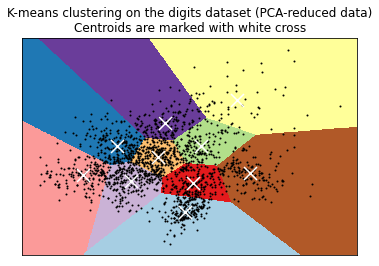

In [5]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
?kmeans++